In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import ccf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler

# Initial Lookup + EDA

In [33]:
df = pd.read_csv('df.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DATE                         100 non-null    object 
 1   COPPER_PRICE                 100 non-null    float64
 2   BUY_PRICE                    100 non-null    float64
 3   GLOBAL_CONSUMER_PRICE_INDEX  100 non-null    float64
 4   SIX_MONTH_DEMAND             100 non-null    float64
 5   GOLD_PRICE                   100 non-null    float64
 6   INVENTORY                    100 non-null    float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [35]:
df.dtypes

DATE                            object
COPPER_PRICE                   float64
BUY_PRICE                      float64
GLOBAL_CONSUMER_PRICE_INDEX    float64
SIX_MONTH_DEMAND               float64
GOLD_PRICE                     float64
INVENTORY                      float64
dtype: object

In [36]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month

In [37]:
df.describe()

,COPPER_PRICE,BUY_PRICE,GLOBAL_CONSUMER_PRICE_INDEX,SIX_MONTH_DEMAND,GOLD_PRICE,INVENTORY,YEAR,MONTH
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.224293,2.722543,159.989632,34.914723,2087.926152,28.700803,2023.680000,6.340000
std,0.275635,0.275799,23.512718,9.555565,178.331839,11.567952,2.424121,3.496665
min,2.654811,2.145191,117.999071,11.625787,1802.154844,3.505353,2020.000000,1.000000
25%,3.066623,2.571619,139.976578,27.905697,1933.797925,21.728733,2022.000000,3.000000
50%,3.251567,2.749005,159.399685,34.725549,2094.859819,29.972672,2024.000000,6.000000
75%,3.368083,2.881985,179.810986,41.643890,2248.064183,36.084329,2026.000000,9.000000
max,3.906448,3.408610,199.289260,55.510056,2386.981577,55.818895,2028.000000,12.000000


In [38]:
df.isnull().sum()

DATE                           0
COPPER_PRICE                   0
BUY_PRICE                      0
GLOBAL_CONSUMER_PRICE_INDEX    0
SIX_MONTH_DEMAND               0
GOLD_PRICE                     0
INVENTORY                      0
YEAR                           0
MONTH                          0
dtype: int64

In [39]:
df

,DATE,COPPER_PRICE,BUY_PRICE,GLOBAL_CONSUMER_PRICE_INDEX,SIX_MONTH_DEMAND,GOLD_PRICE,INVENTORY,YEAR,MONTH
0,2020-01-01,3.137096,2.661115,117.999071,30.943593,2345.428509,11.721919,2020,1
1,2020-02-01,3.080626,2.601521,121.141858,39.010606,2339.954887,34.574074,2020,2
2,2020-03-01,3.116939,2.596875,122.787487,37.089984,1915.409552,28.794901,2020,3
3,2020-04-01,3.180225,2.717195,124.483782,39.637642,2119.374158,40.498696,2020,4
4,2020-05-01,3.220652,2.707316,121.855462,31.061250,2113.274844,34.927412,2020,5
...,...,...,...,...,...,...,...,...,...
95,2027-12-01,3.510925,3.032640,196.290341,47.405890,2348.688526,22.279791,2027,12
96,2028-01-01,3.397751,2.905826,197.409496,49.262588,2034.178653,6.486046,2028,1
97,2028-02-01,3.251829,2.763559,199.246402,52.169598,1842.176256,46.331669,2028,2
98,2028-03-01,3.259828,2.796132,199.289260,51.048567,2224.503966,39.992547,2028,3


In [40]:
df.head()

,DATE,COPPER_PRICE,BUY_PRICE,GLOBAL_CONSUMER_PRICE_INDEX,SIX_MONTH_DEMAND,GOLD_PRICE,INVENTORY,YEAR,MONTH
0,2020-01-01,3.137096,2.661115,117.999071,30.943593,2345.428509,11.721919,2020,1
1,2020-02-01,3.080626,2.601521,121.141858,39.010606,2339.954887,34.574074,2020,2
2,2020-03-01,3.116939,2.596875,122.787487,37.089984,1915.409552,28.794901,2020,3
3,2020-04-01,3.180225,2.717195,124.483782,39.637642,2119.374158,40.498696,2020,4
4,2020-05-01,3.220652,2.707316,121.855462,31.061250,2113.274844,34.927412,2020,5


C:\Users\MDY\AppData\Local\Temp\ipykernel_15740\3584867338.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


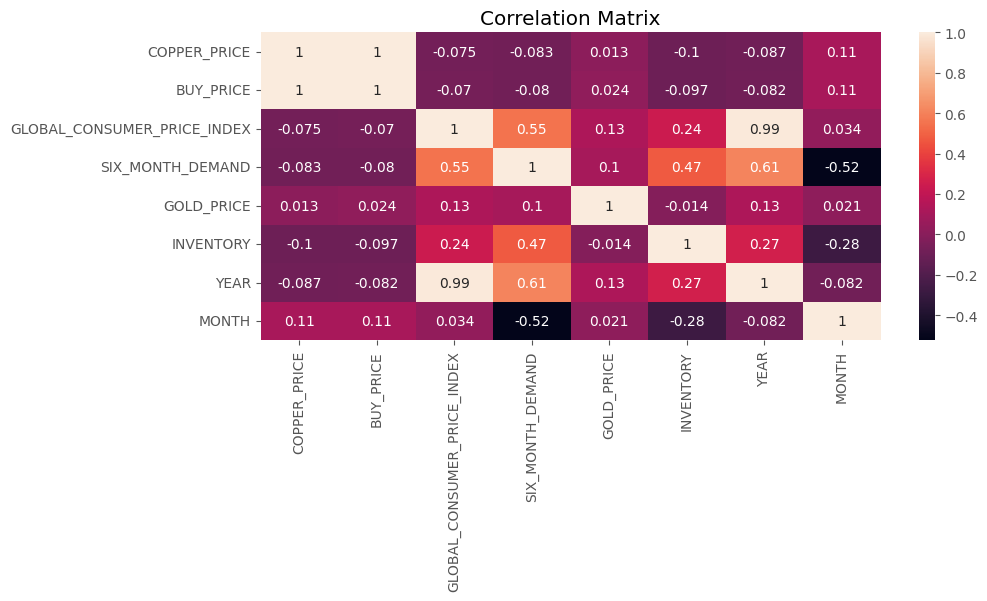

In [41]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

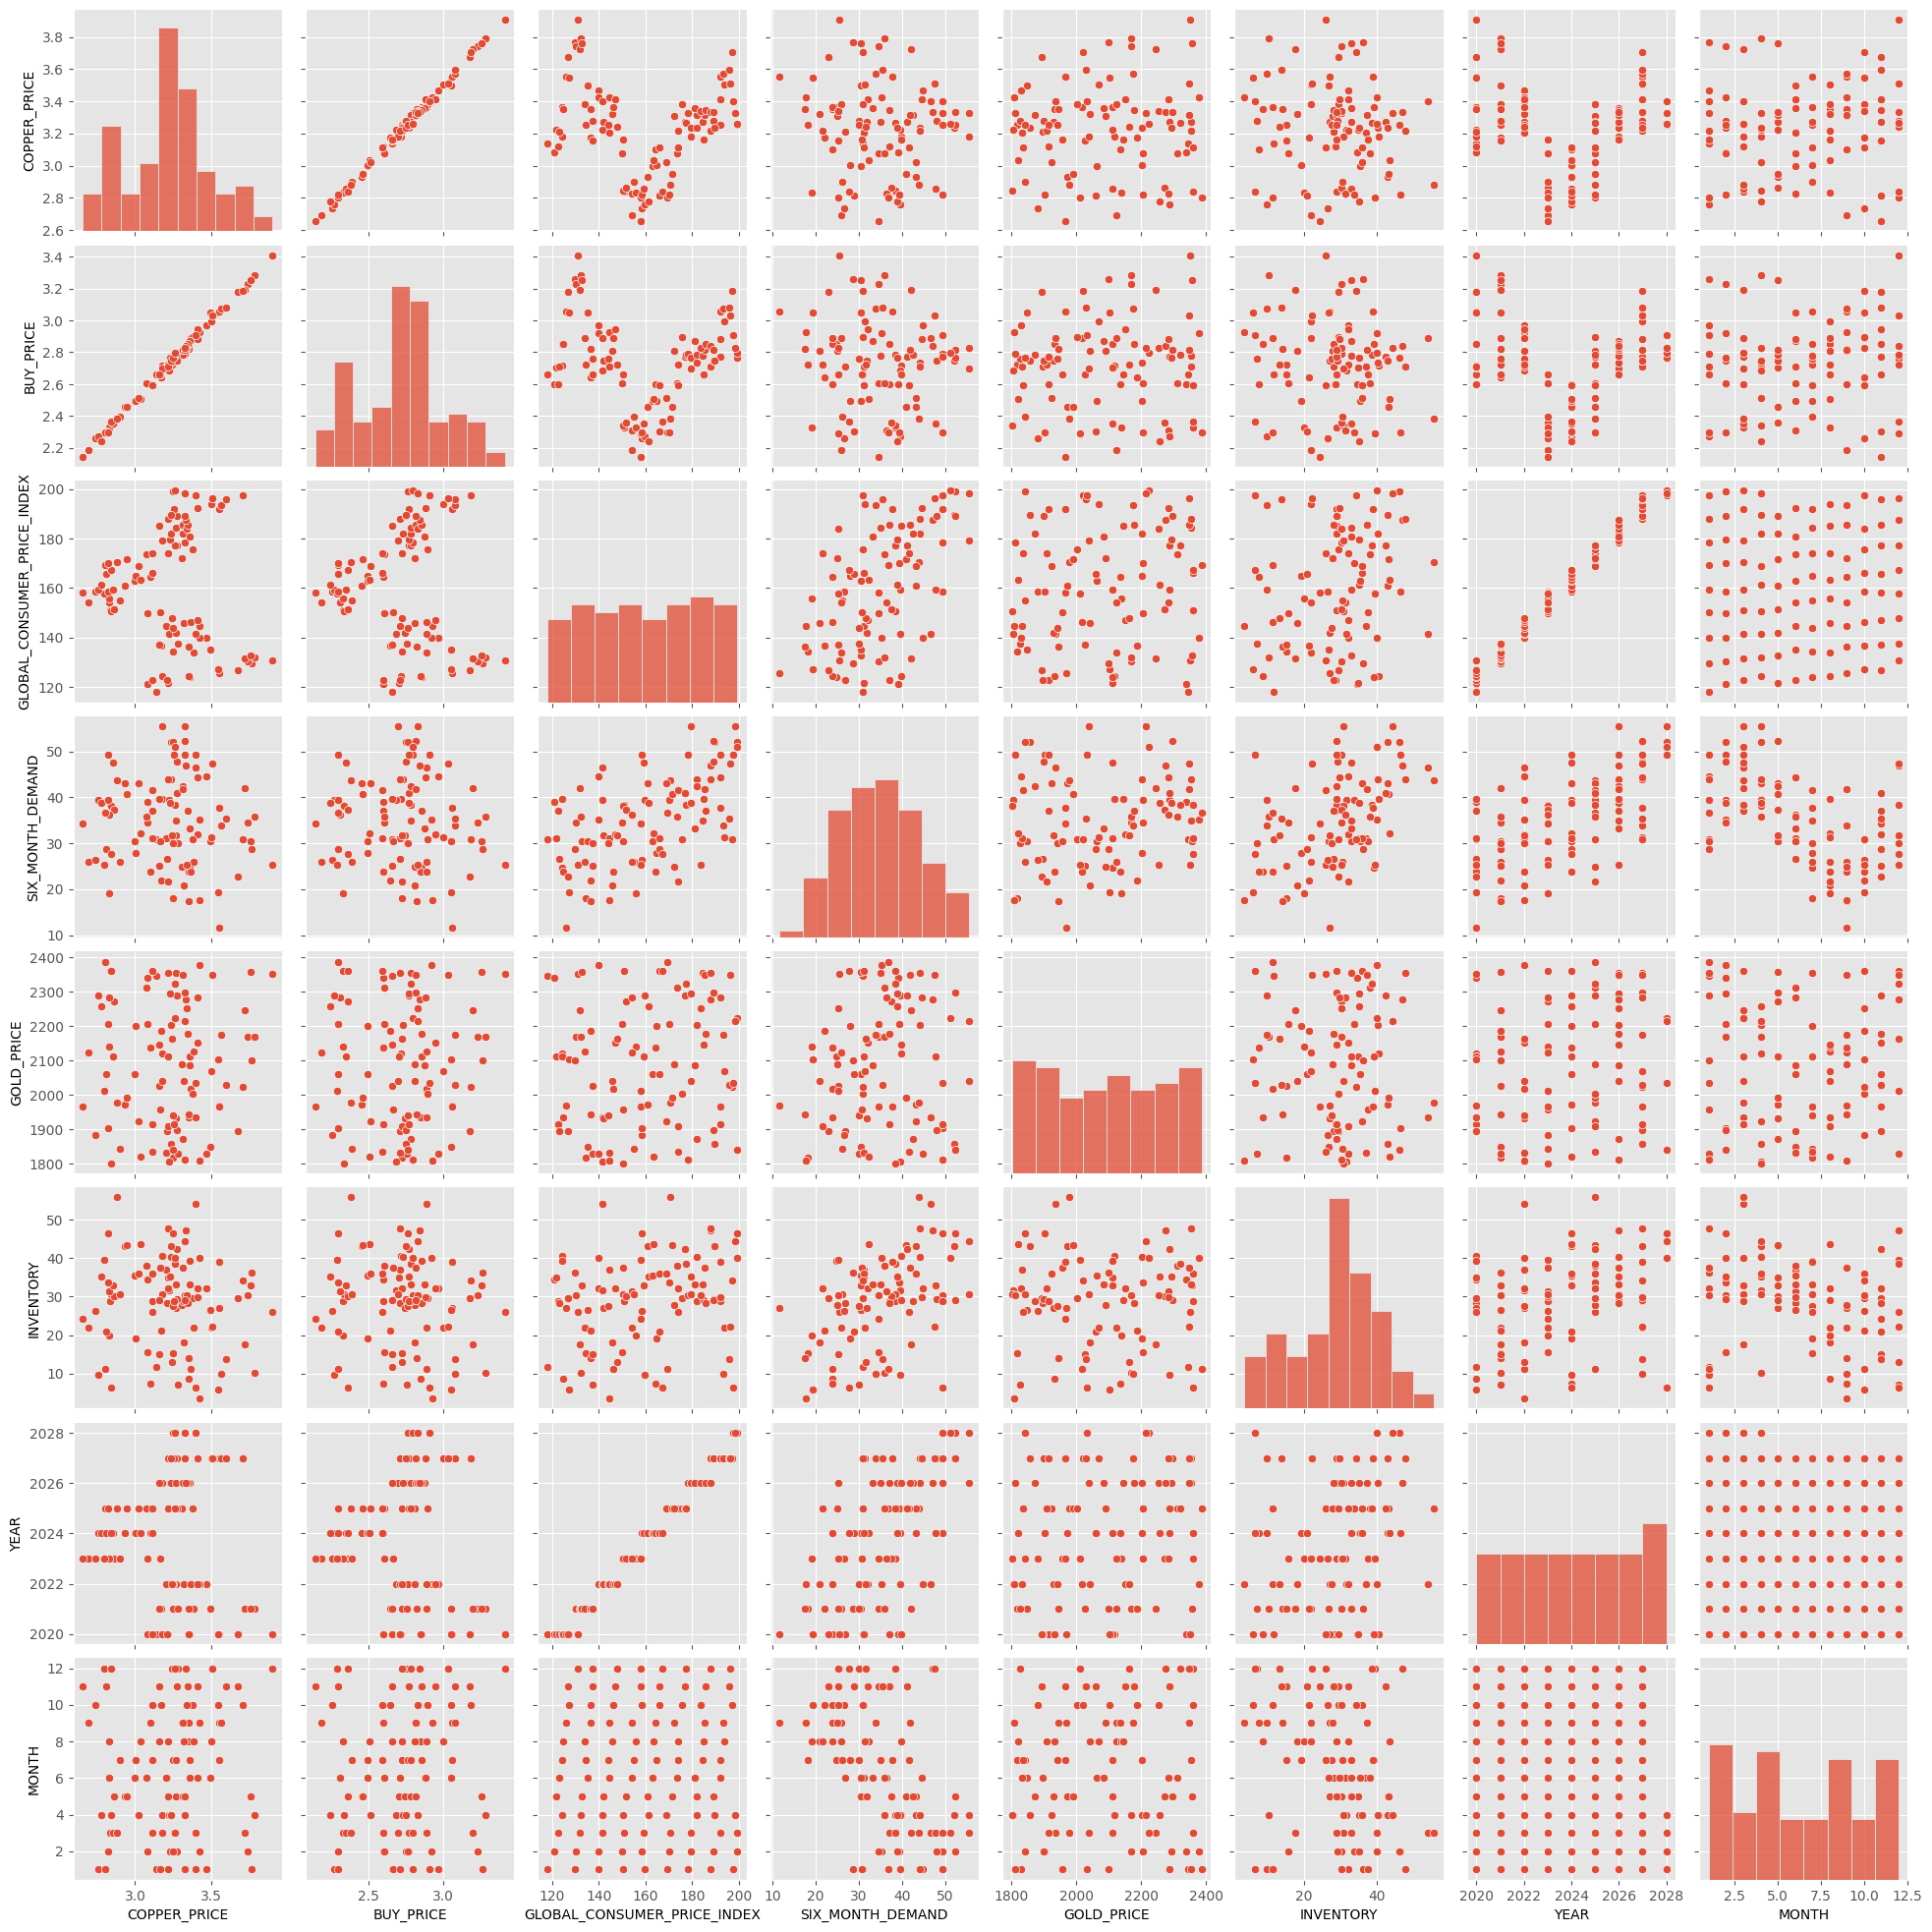

In [42]:
sns.pairplot(df)

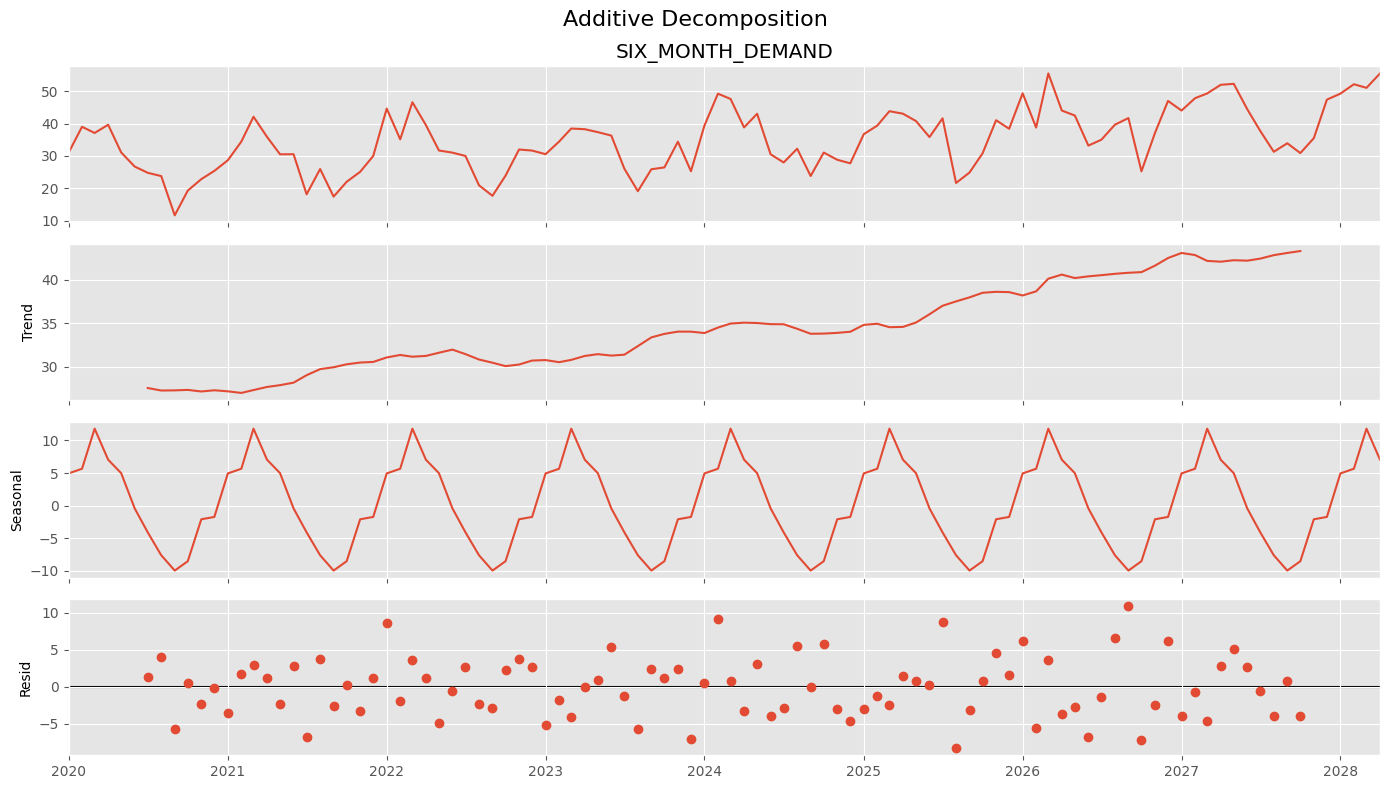

In [43]:
df_seasonal = df.set_index('DATE', inplace=False)
additive_decomposition  = seasonal_decompose(df_seasonal['SIX_MONTH_DEMAND'], model='additive', period=12)

plt.rcParams.update({'figure.figsize': (14,8)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout()

# Seasonality across columns

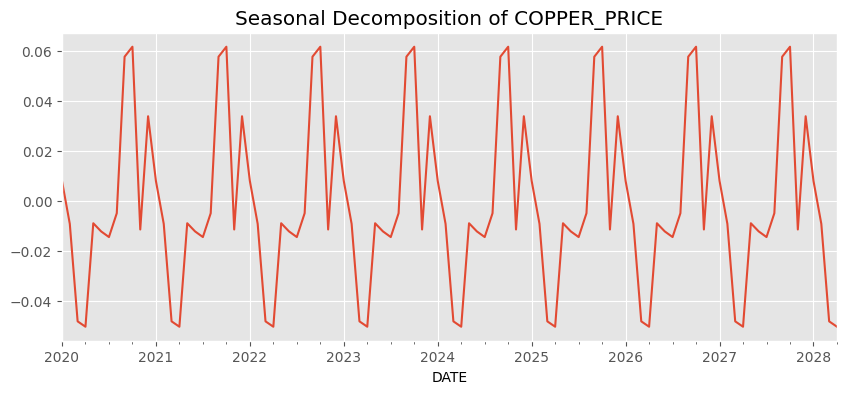

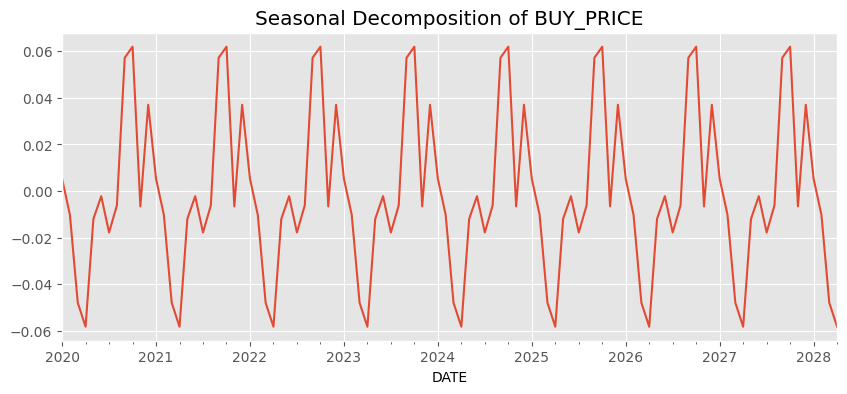

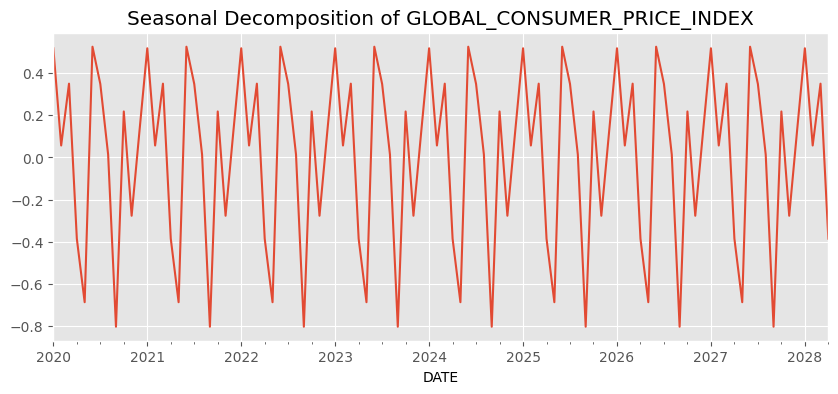

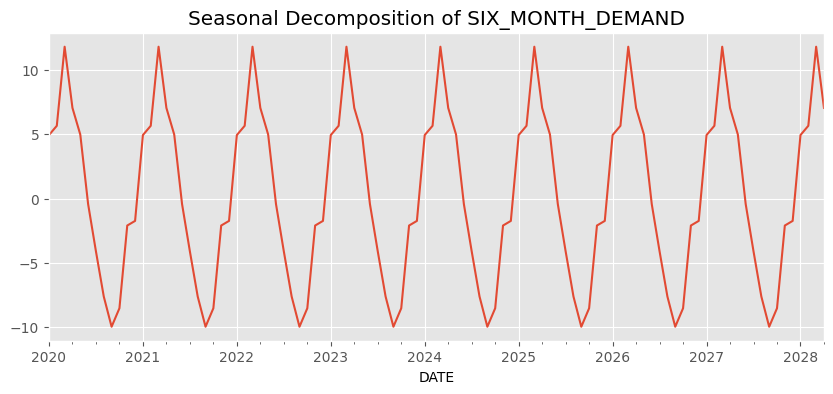

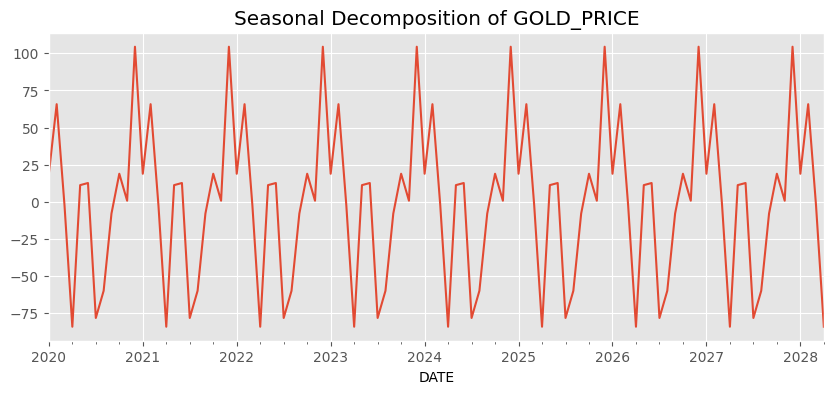

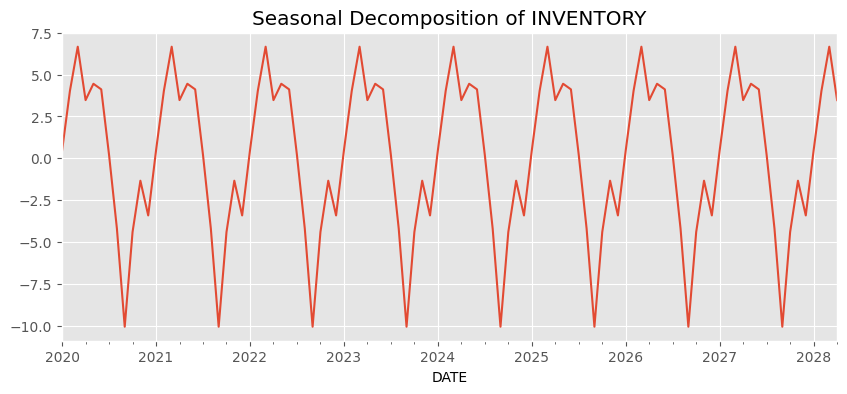

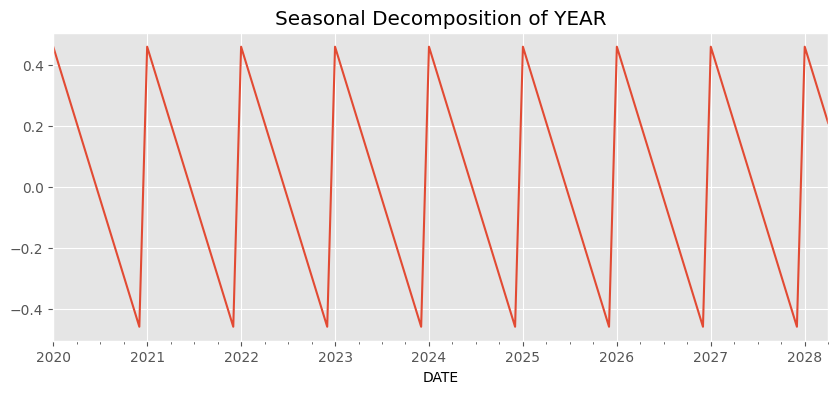

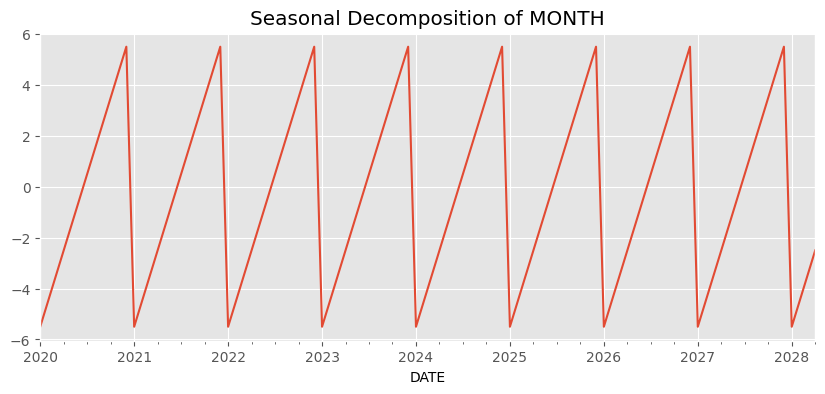

In [44]:
plt.rcParams.update({'figure.figsize': (10,4)})

for x in df_seasonal.columns:
    additive_decomposition  = seasonal_decompose(df_seasonal[x], model='additive', period=12)
    additive_decomposition.seasonal.plot()
    plt.title(f'Seasonal Decomposition of {x}')
    plt.show()

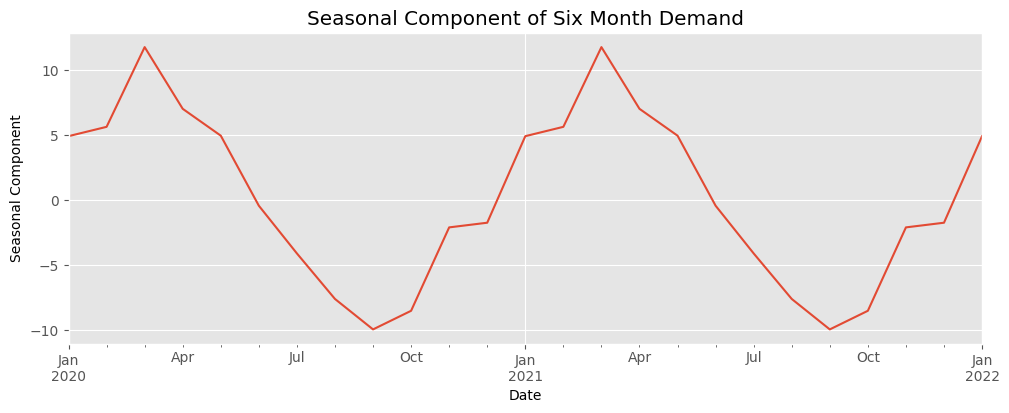

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

additive_decomposition  = seasonal_decompose(df_seasonal['SIX_MONTH_DEMAND'], model='additive', period=12)
plt.rcParams.update({'figure.figsize': (10,4)})

seasonal_comp = additive_decomposition.seasonal

seasonal_comp[seasonal_comp.index <= pd.to_datetime('2022')].plot()
plt.tight_layout()
plt.xlabel('Date')

plt.ylabel('Seasonal Component')
plt.title('Seasonal Component of Six Month Demand')
plt.show()

In [46]:
seasonal_comp = additive_decomposition.seasonal
seasonal_comp_df = seasonal_comp.to_frame()

<Axes: xlabel='DATE'>

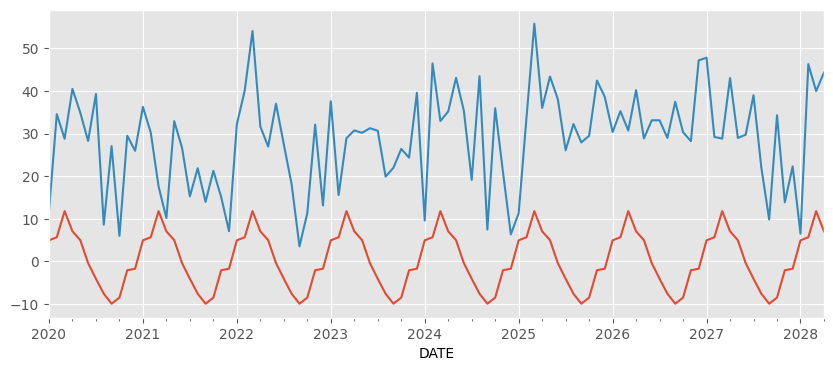

In [47]:

seasonal_comp_df['seasonal'].plot()
df_seasonal['INVENTORY'].plot()

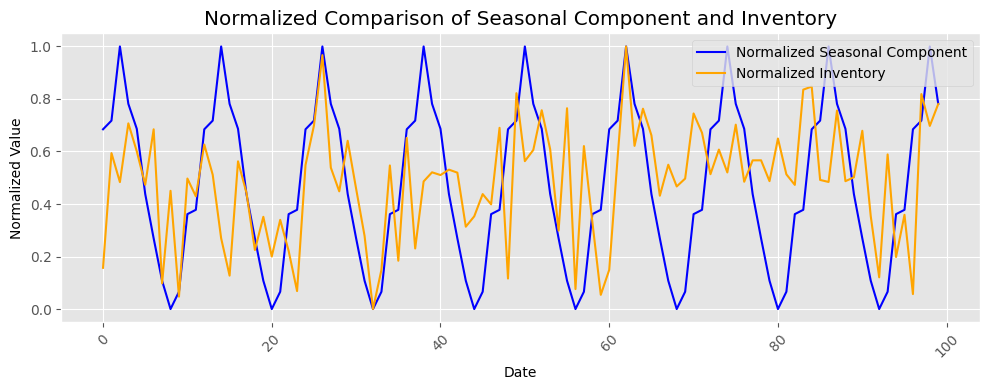

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalized_seasonal = scaler.fit_transform(seasonal_comp_df[['seasonal']])
normalized_inventory = scaler.fit_transform(df_seasonal[['INVENTORY']])

plt.figure(figsize=(10, 4))
plt.plot(normalized_seasonal, label='Normalized Seasonal Component', color='blue')
plt.plot(normalized_inventory, label='Normalized Inventory', color='orange')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Normalized Comparison of Seasonal Component and Inventory')
plt.legend()
plt.xticks(rotation=45) 
plt.tight_layout() 

plt.show()


# Auto Correlation

In [49]:
df_seasonal

,COPPER_PRICE,BUY_PRICE,GLOBAL_CONSUMER_PRICE_INDEX,SIX_MONTH_DEMAND,GOLD_PRICE,INVENTORY,YEAR,MONTH
DATE,,,,,,,,
2020-01-01,3.137096,2.661115,117.999071,30.943593,2345.428509,11.721919,2020,1
2020-02-01,3.080626,2.601521,121.141858,39.010606,2339.954887,34.574074,2020,2
2020-03-01,3.116939,2.596875,122.787487,37.089984,1915.409552,28.794901,2020,3
2020-04-01,3.180225,2.717195,124.483782,39.637642,2119.374158,40.498696,2020,4
2020-05-01,3.220652,2.707316,121.855462,31.061250,2113.274844,34.927412,2020,5
...,...,...,...,...,...,...,...,...
2027-12-01,3.510925,3.032640,196.290341,47.405890,2348.688526,22.279791,2027,12
2028-01-01,3.397751,2.905826,197.409496,49.262588,2034.178653,6.486046,2028,1
2028-02-01,3.251829,2.763559,199.246402,52.169598,1842.176256,46.331669,2028,2


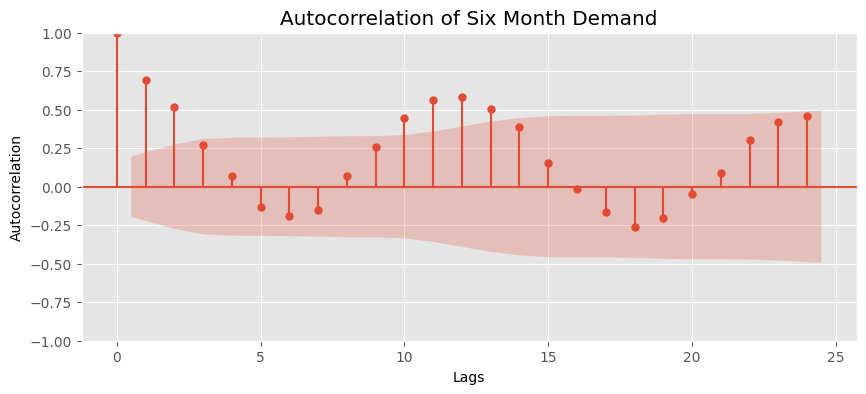

In [50]:
fig, axes = plt.subplots(1, 1, figsize=(10, 4), dpi=100)
plot_acf(df_seasonal['SIX_MONTH_DEMAND'].tolist(), lags=24, ax=axes)
axes.set_title('Autocorrelation of Six Month Demand')
axes.set_xlabel('Lags')
axes.set_ylabel('Autocorrelation')
plt.show()

C:\Users\MDY\AppData\Local\Temp\ipykernel_15740\2092980647.py:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, cross_corr, use_line_collection=True)


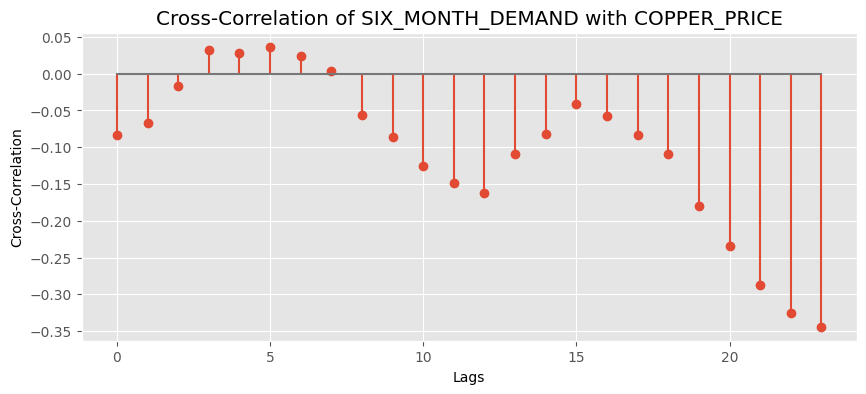

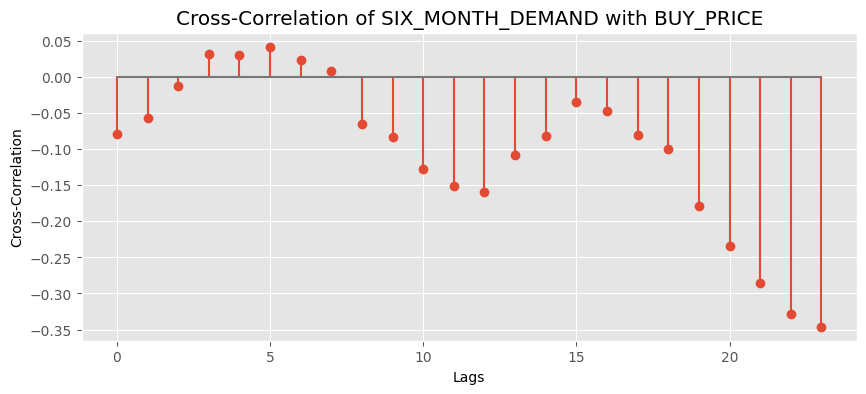

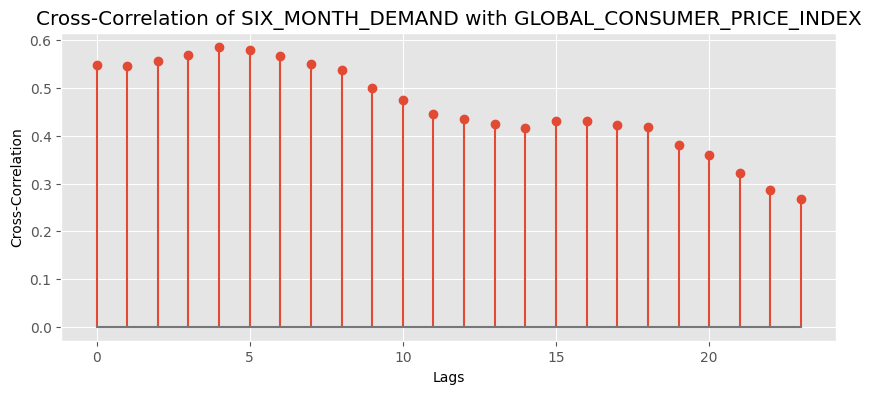

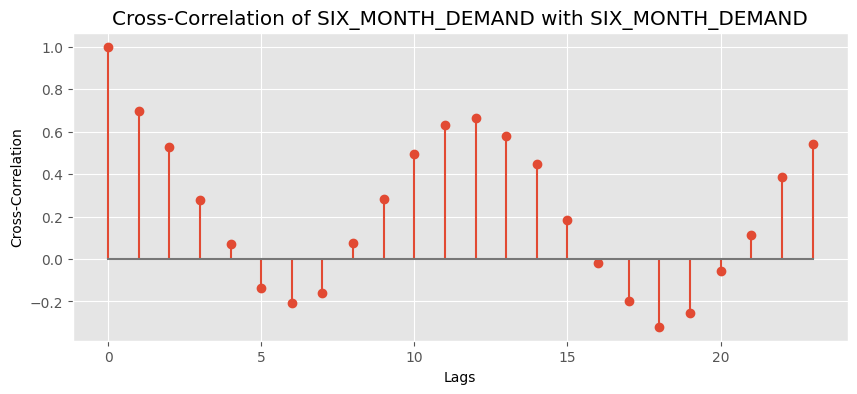

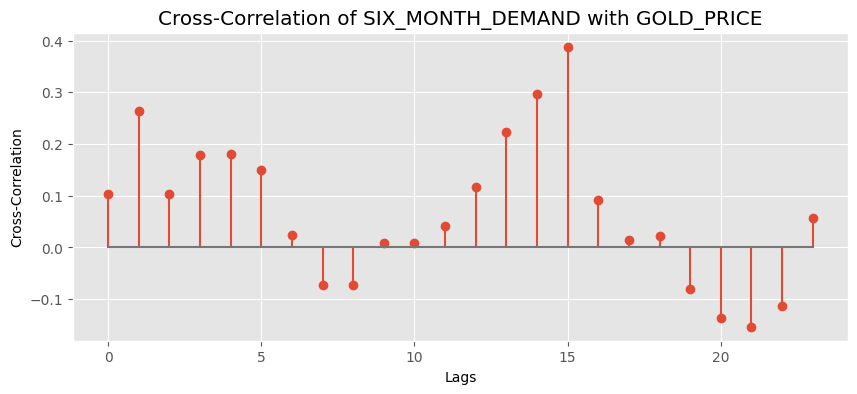

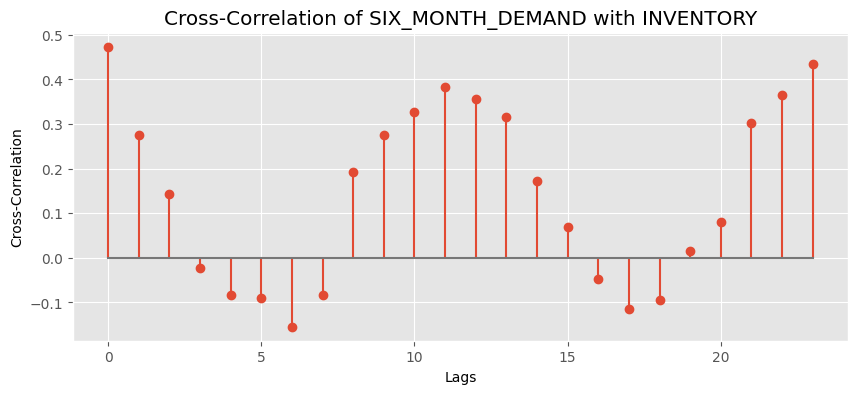

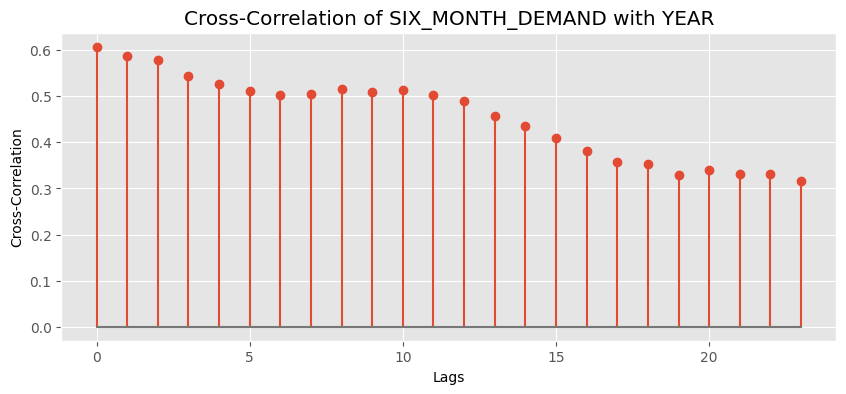

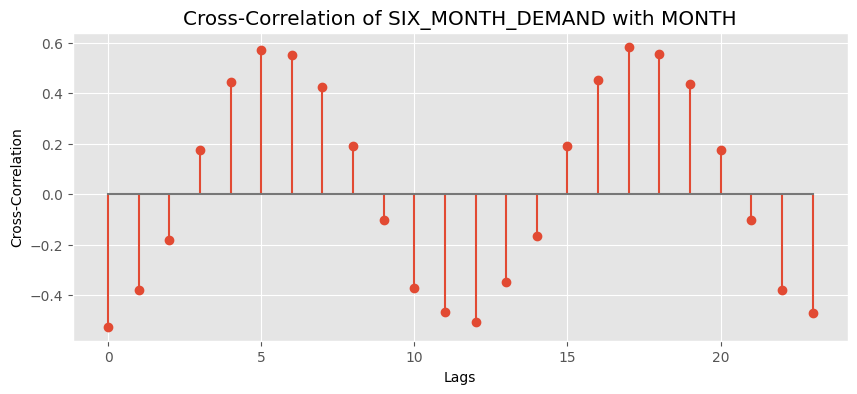

In [51]:
for i, column in enumerate(df_seasonal.columns):
    cross_corr = ccf(df_seasonal['SIX_MONTH_DEMAND'], df_seasonal[column])[:24]
    lags = np.arange(24)

    plt.figure(figsize=(10, 4), dpi=100)
    plt.stem(lags, cross_corr, use_line_collection=True)
    plt.title(f'Cross-Correlation of SIX_MONTH_DEMAND with {column}')
    plt.xlabel('Lags')
    plt.ylabel('Cross-Correlation')

    plt.show()

In [52]:
# Initial lookup:
# No missing values
# Variance is very high for Gold_price and CPI
# Might need to normalize/standarize the data for linear ML models

# Data Visualization 

<Axes: xlabel='DATE'>

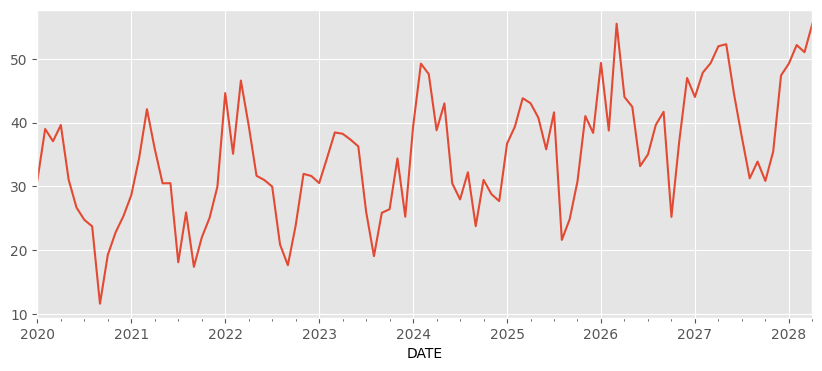

In [53]:
df_seasonal['SIX_MONTH_DEMAND'].plot()  

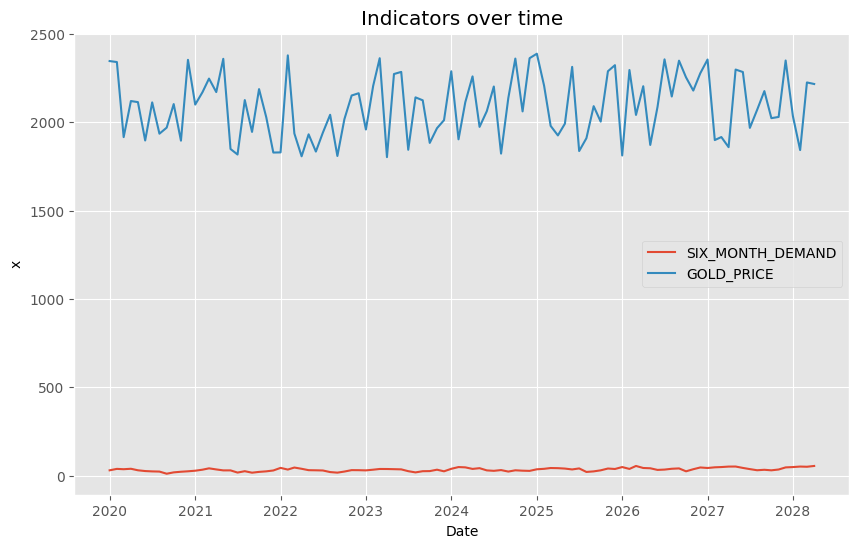

In [54]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df[['SIX_MONTH_DEMAND','GOLD_PRICE']])
plt.legend(['SIX_MONTH_DEMAND', 'GOLD_PRICE'])
plt.title('Indicators over time')
plt.xlabel('Date')
plt.ylabel('x')
plt.show()

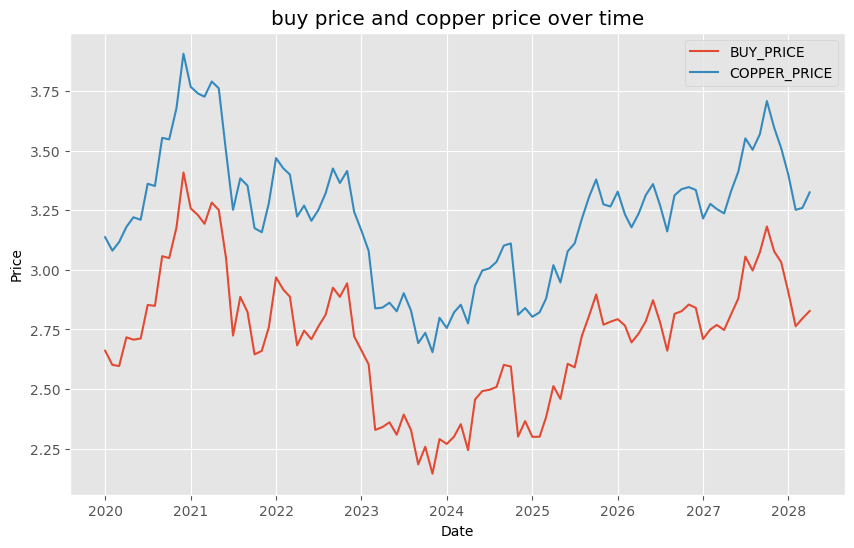

In [55]:
# Buy price | copper_price
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df[['BUY_PRICE','COPPER_PRICE']])
plt.legend(['BUY_PRICE', 'COPPER_PRICE'])
plt.title('buy price and copper price over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

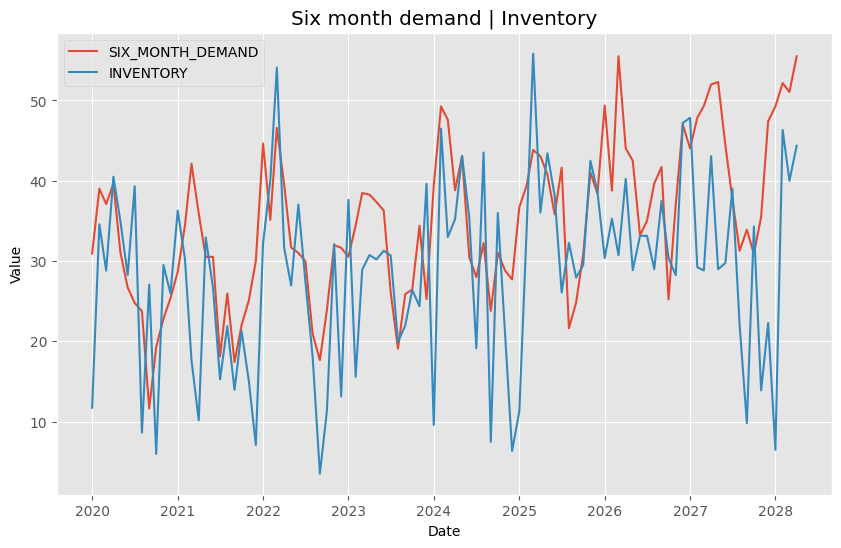

In [56]:
# Six month demand | Inventory - No Mapping
plt.figure(figsize=(10, 6))
plt.plot(df_seasonal[['SIX_MONTH_DEMAND','INVENTORY']])
plt.legend(['SIX_MONTH_DEMAND', 'INVENTORY'])
plt.title('Six month demand | Inventory')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

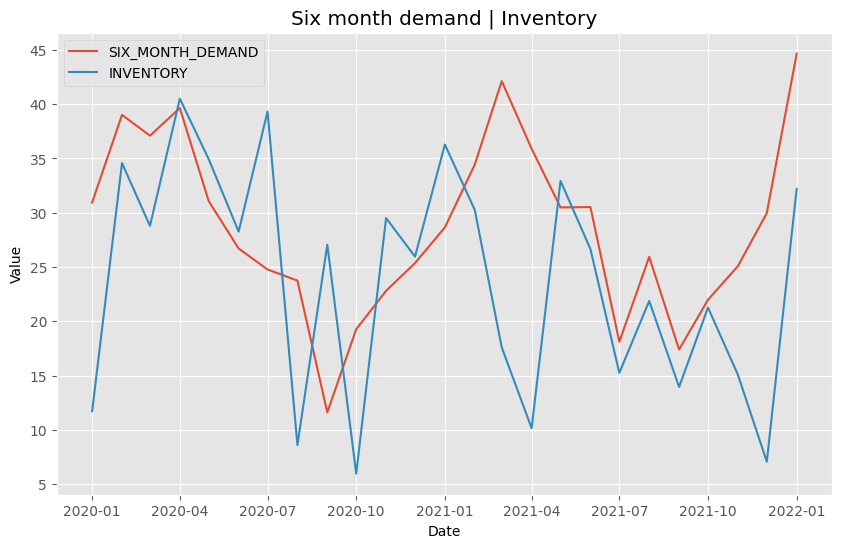

In [57]:
# Six month demand | Inventory - No Mapping / Zoomed in
df_seasonal = df.set_index('DATE', inplace=False)
df_seasonal = df_seasonal.loc['2020-01-01':'2022-01-01']
plt.figure(figsize=(10, 6))
plt.plot(df_seasonal[['SIX_MONTH_DEMAND','INVENTORY']])
plt.legend(['SIX_MONTH_DEMAND', 'INVENTORY'])
plt.title('Six month demand | Inventory')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

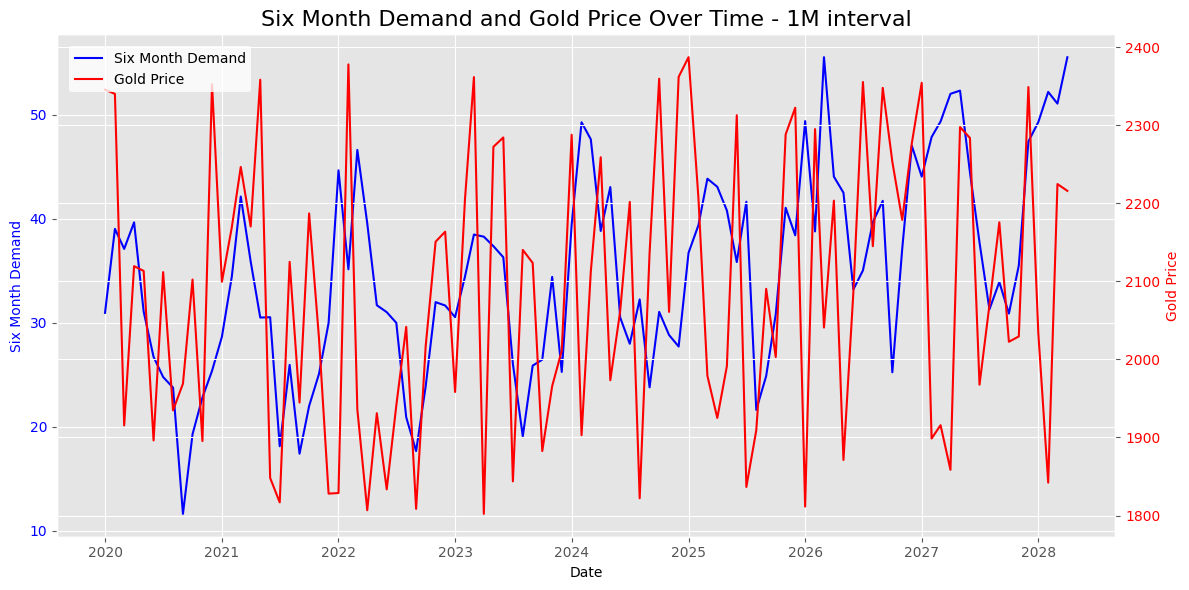

In [58]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

line1 = ax1.plot(df['DATE'], df['SIX_MONTH_DEMAND'], color='blue', label='Six Month Demand')
ax1.set_xlabel('Date')
ax1.set_ylabel('Six Month Demand', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
line2 = ax2.plot(df['DATE'], df['GOLD_PRICE'], color='red', label='Gold Price')
ax2.set_ylabel('Gold Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Six Month Demand and Gold Price Over Time - 1M interval', fontsize=16)

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.005, 0.99), 
           fontsize=10, facecolor='white', edgecolor='none')

fig.tight_layout() 
plt.show()

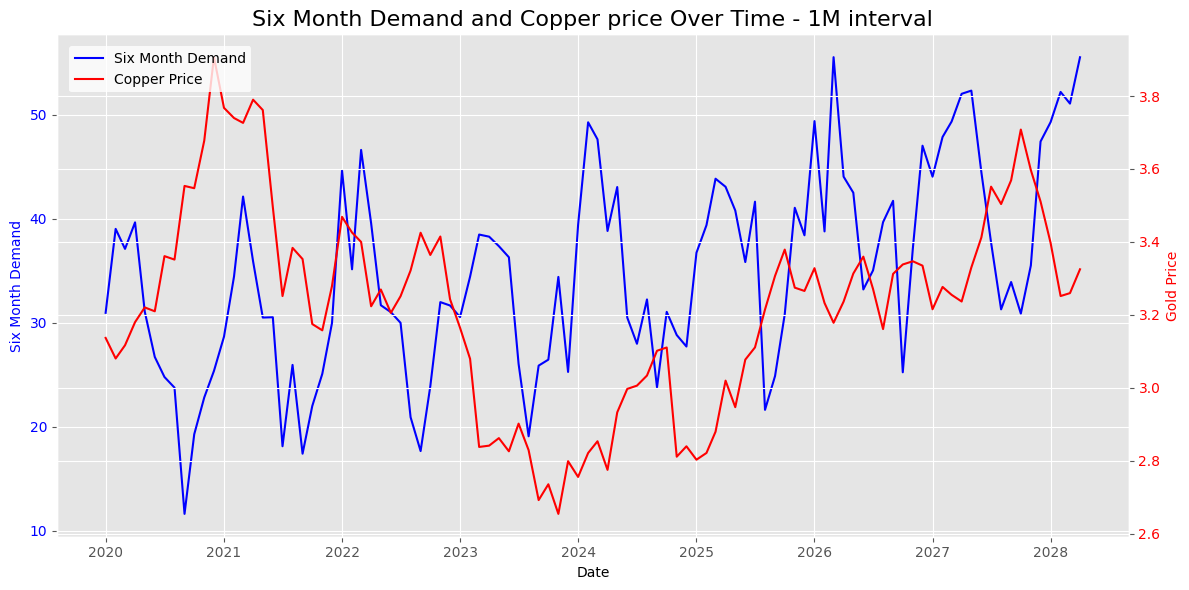

In [59]:
# Demand | Copper_price

fig, ax1 = plt.subplots(figsize=(12, 6))

line1 = ax1.plot(df['DATE'], df['SIX_MONTH_DEMAND'], color='blue', label='Six Month Demand')
ax1.set_xlabel('Date')
ax1.set_ylabel('Six Month Demand', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
line2 = ax2.plot(df['DATE'], df['COPPER_PRICE'], color='red', label='Copper Price')
ax2.set_ylabel('Gold Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Six Month Demand and Copper price Over Time - 1M interval', fontsize=16)

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.005, 0.99), 
           fontsize=10, facecolor='white', edgecolor='none')

fig.tight_layout() 
plt.show()

# Visualisation - grouped by a year

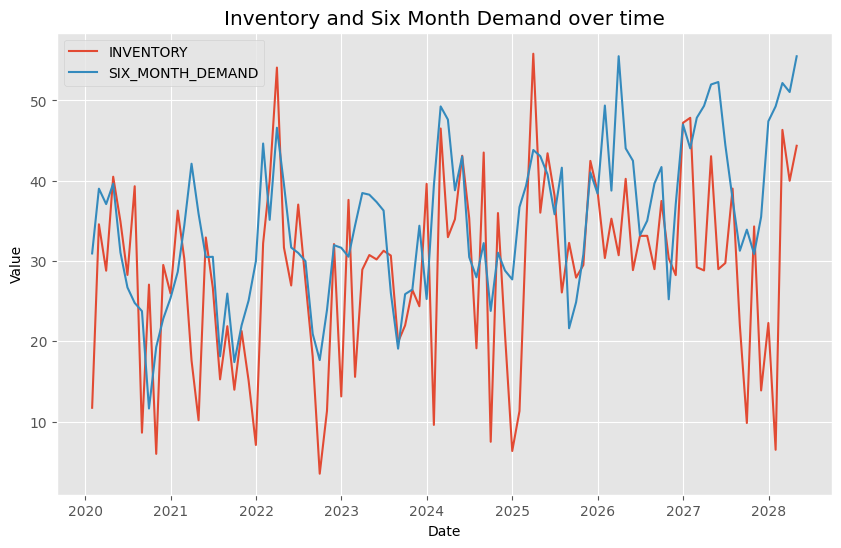

In [60]:
# Grouped by year - mean
df_yearly = df.resample('1M', on='DATE').mean()

plt.figure(figsize=(10, 6))
plt.plot(df_yearly.index, df_yearly[['INVENTORY', 'SIX_MONTH_DEMAND']])
plt.legend(['INVENTORY', 'SIX_MONTH_DEMAND'])
plt.title('Inventory and Six Month Demand over time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


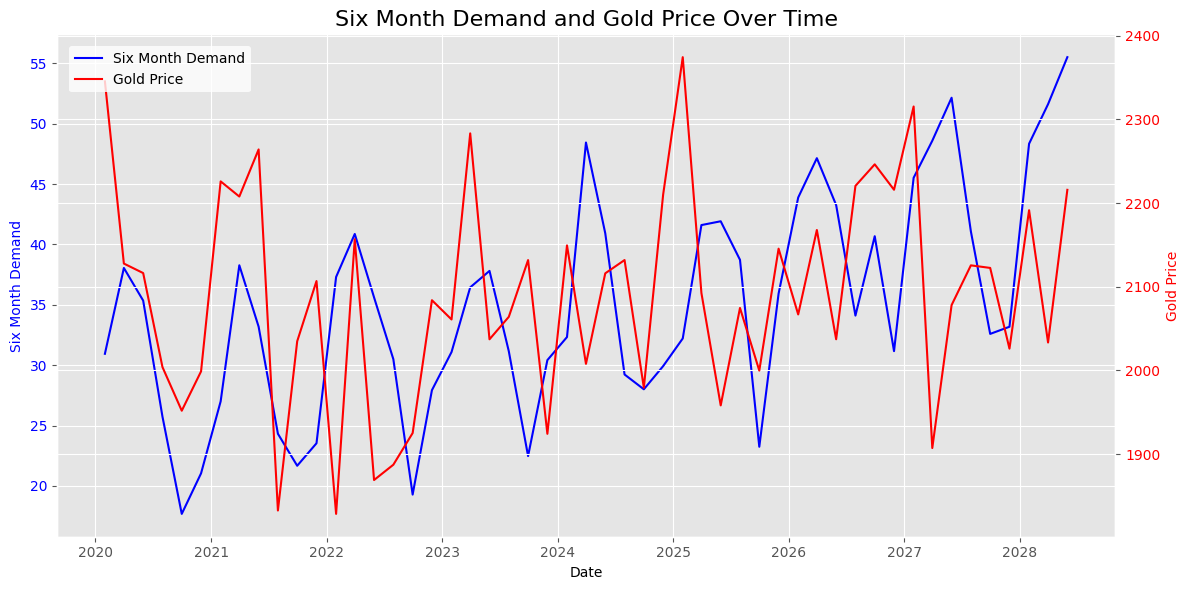

In [61]:
import matplotlib.pyplot as plt
df_half_yearly = df.resample('2M', on='DATE').mean()
fig, ax1 = plt.subplots(figsize=(12, 6))

line1 = ax1.plot(df_half_yearly.index, df_half_yearly['SIX_MONTH_DEMAND'], color='blue', label='Six Month Demand')
ax1.set_xlabel('Date')
ax1.set_ylabel('Six Month Demand', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
line2 = ax2.plot(df_half_yearly.index, df_half_yearly['GOLD_PRICE'], color='red', label='Gold Price')
ax2.set_ylabel('Gold Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Six Month Demand and Gold Price Over Time', fontsize=16)

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.005, 0.99), 
           fontsize=10, facecolor='white', edgecolor='none')

fig.tight_layout() 
plt.show()

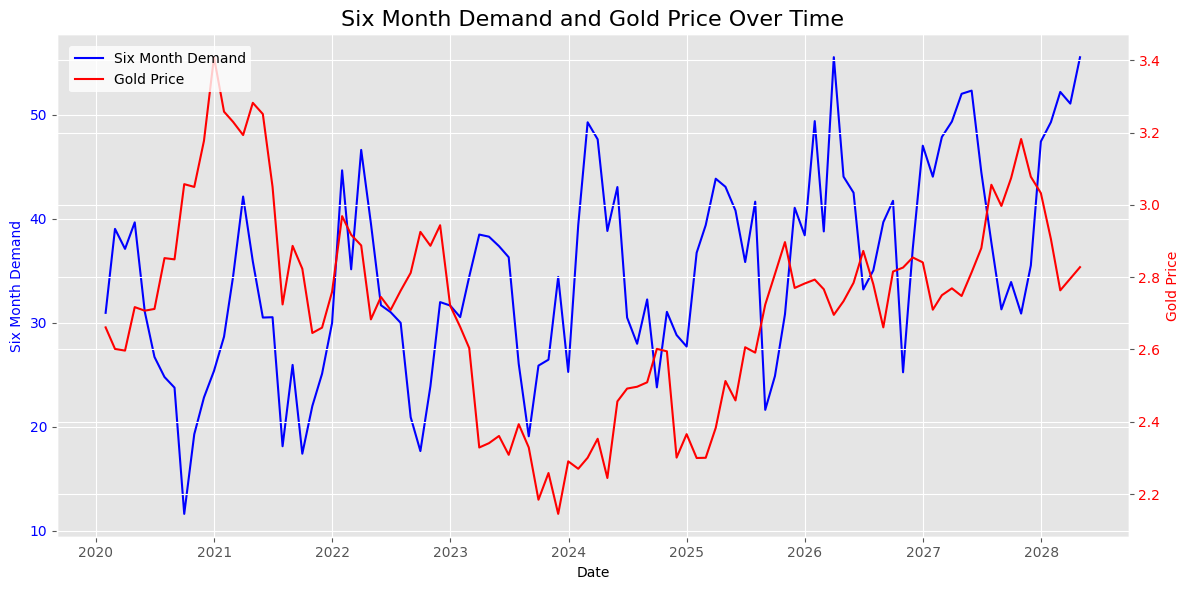

In [62]:
import matplotlib.pyplot as plt
df_half_yearly = df.resample('1M', on='DATE').mean()
fig, ax1 = plt.subplots(figsize=(12, 6))

line1 = ax1.plot(df_half_yearly.index, df_half_yearly['SIX_MONTH_DEMAND'], color='blue', label='Six Month Demand')
ax1.set_xlabel('Date')
ax1.set_ylabel('Six Month Demand', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
line2 = ax2.plot(df_half_yearly.index, df_half_yearly['BUY_PRICE'], color='red', label='Gold Price')
ax2.set_ylabel('Gold Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Six Month Demand and Gold Price Over Time', fontsize=16)

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.005, 0.99), 
           fontsize=10, facecolor='white', edgecolor='none')

fig.tight_layout() 
plt.show()